In [ ]:
!sudo add-apt-repository ppa:deadsnakes/ppa -y
!sudo apt-get update -y
!sudo apt-get install python3.12 python3.12-venv python3.12-dev -y
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.12 2
!sudo update-alternatives --set python3 /usr/bin/python3.12
!python3 -m ensurepip
!python3 -m pip install --upgrade pip
!python -V

Repository: 'deb https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu/ jammy main'
Description:
This PPA contains more recent Python versions packaged for Ubuntu.

Disclaimer: there's no guarantee of timely updates in case of security problems or other issues. If you want to use them in a security-or-otherwise-critical environment (say, on a production server), you do so at your own risk.

Update Note
Please use this repository instead of ppa:fkrull/deadsnakes.

Reporting Issues

Issues can be reported in the master issue tracker at:
https://github.com/deadsnakes/issues/issues

Supported Ubuntu and Python Versions

- Ubuntu 20.04 (focal) Python3.5 - Python3.7, Python3.9 - Python3.13
- Ubuntu 22.04 (jammy) Python3.7 - Python3.9, Python3.11 - Python3.13
- Ubuntu 24.04 (noble) Python3.7 - Python3.11, Python3.13
- Note: Python2.7 (focal, jammy), Python 3.8 (focal), Python 3.10 (jammy), Python3.12 (noble) are not provided by deadsnakes as upstream ubuntu provides those packages.

Why some

In [ ]:
!python -V

Python 3.12.11


In [ ]:
!pip install Torch==2.2.2 TorchVision==0.17.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 154.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 170.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import torchvision.transforms as T, Compose
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

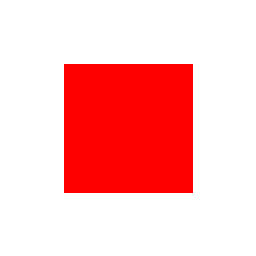

In [4]:
base_image = Image.new("RGB", (256, 256), "white")
draw = ImageDraw.Draw(base_image)
draw.rectangle([64, 64, 192, 192], fill="red")
base_image

In [ ]:
torch_transforms = {
    "Resize": T.Resize((224, 224)),
    "RandomHorizontalFlip": T.RandomHorizontalFlip(p=1.0),
    "RandomRotation": T.RandomRotation(degrees=30),
    "ColorJitter": T.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
    "GaussianBlur": T.GaussianBlur(kernel_size=11)
}

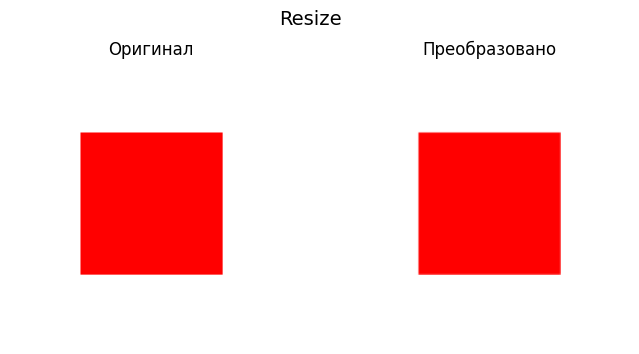

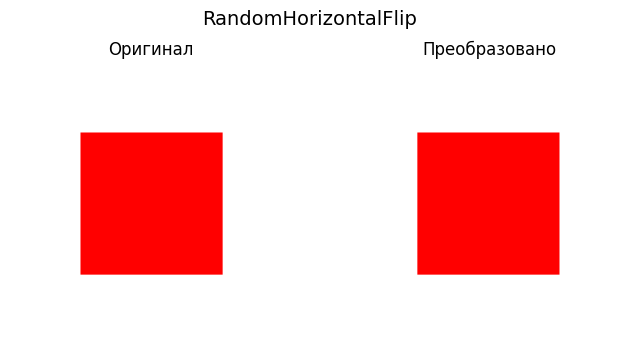

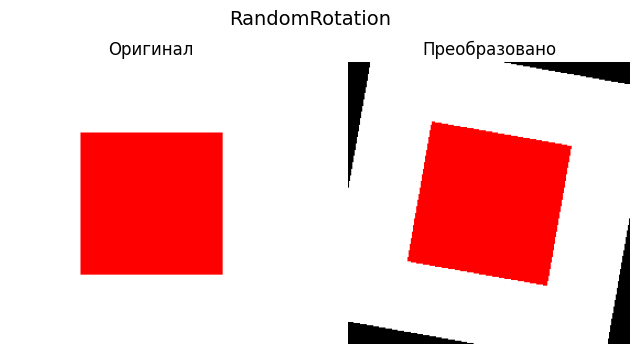

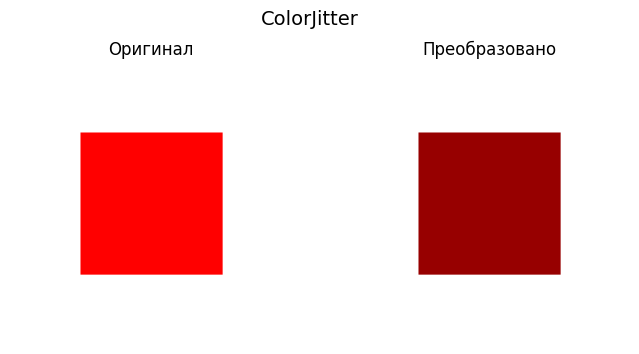

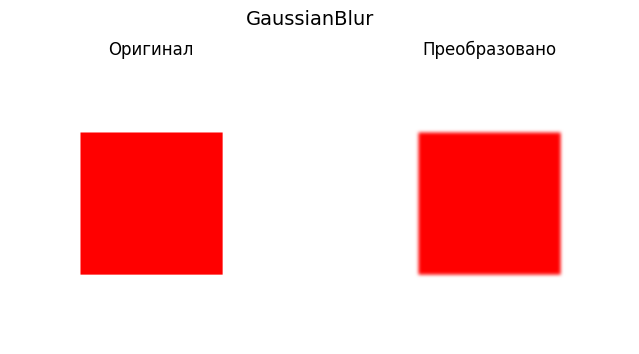

In [ ]:
for name, transform in torch_transforms.items():
    transformed_image = transform(base_image)

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    fig.suptitle(name, fontsize=14)
    axes[0].imshow(base_image)
    axes[0].set_title("Оригинал")
    axes[0].axis("off")
    axes[1].imshow(transformed_image)
    axes[1].set_title("Преобразовано")
    axes[1].axis("off")
    plt.show()

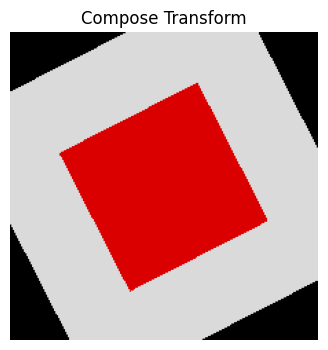

In [5]:
compose_transform = Compose([
    T.Resize((224, 224)),
    T.RandomHorizontalFlip(p=1.0),
    T.RandomRotation(degrees=30),
    T.ColorJitter(brightness=0.5, contrast=0.5)
])

transformed_image = compose_transform(base_image)

plt.figure(figsize=(4,4))
plt.imshow(transformed_image)
plt.title("Compose Transform")
plt.axis("off")
plt.show()

1. Resize:
   - Преобразование изменяет размер изображения до фиксированного размера без сохранения исходного соотношения сторон.
   - Полезно для приведения всех входных изображений к единому размеру, что важно для большинства нейронных сетей.

2. HorizontalFlip:
   - Простое отражение по горизонтали.
  - Увеличивает разнообразие данных, делая модель более устойчивой к зеркальному отражению.

3. RandomRotation:
   - Произвольное вращение изображения в пределах +-30 градусов.
   - Добавляет вариативность углов обзора объектов, делая модель устойчивой к поворотам.

4. ColorJitter:
   - Случайная корректировка яркости, контраста и насыщенности.
   - Полезно для повышения устойчивости модели к изменениям освещения и цветовых условий.

5. GaussianBlur:
   - Применяет гауссово размытие для сглаживания деталей.
   - Уменьшает влияние шума и размытых областей, делая модель устойчивой к низкому качеству изображений.

6. Compose:
  - Применяет все вышеперечисленные изменения последовательно
  - Нужен для создания пайплайна изменения объектов при препроцессинге данных
  - Как следствие имеем плюшки всех прошлых изменений вместе)